In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8.0, 10.0)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

In [99]:
'''
Thompson Sampling
''' 
# steps and size of the problem
T = 10000
K = 5

# probabilities of reward
probs = [1.0/6, 1.0/2, 2.0/3, 3.0/4, 5.0/6]

# initial posterior distribution parmeters : successful and failed trails
succs = [0 for i in range(K)]
fails = [0 for i in range(K)]

for t in range(T):
    # calculate posteriors likelihood for all arms
    posteriors = [np.random.beta(succs[i] + 1, fails[i] + 1) for i in range(K)]

    # choose the arm with highest posterior likelihood to play for this step
    i_chosen = np.argmax(posteriors)
    
    # get the probablity of reward for the chosen arm
    prob = probs[i_chosen]
    
    # observe the reward
    reward = np.random.binomial(1,prob)
    
    # upadte the posterior distribution parmeters based on reward
    if reward == 1:
        succs[i_chosen] += 1 # if reward is 1, increase successful trails by 1
    else: 
        fails[i_chosen] += 1  # if reward is 0, increase failed trails by 1

In [116]:
'''
Thompson Sampling Time Storing
''' 
# steps and size of the problem
T = 2000
K = 5

# probabilities of reward
probs = [1.0/6, 1.0/2, 2.0/3, 3.0/4, 5.0/6]

# initial posterior distribution parmeters : successful and failed trails
succs = [0 for i in range(K)]
fails = [0 for i in range(K)]

# list to store info
choice_list = []
avg_reward_list = []
total_reward = 0

for t in range(T):
    # calculate posteriors likelihood for all arms
    posteriors = [np.random.beta(succs[i] + 1, fails[i] + 1) for i in range(K)]
    
    # choose the arm with highest posterior likelihood to play for this step
    i_chosen = np.argmax(posteriors)
    choice_list.append(i_chosen)
    
    # get the probablity of reward for the chosen arm
    prob = probs[i_chosen]
    
    # observe the reward
    reward = np.random.binomial(1,prob)
    total_reward += reward
    if t == 0:
        avg_reward_list.append(np.nan)
    else:
        avg_reward_list.append(total_reward * 1.0 / t)
    
    # upadte the posterior distribution parmeters based on reward
    if reward == 1:
        succs[i_chosen] += 1 # if reward is 1, increase successful trails by 1
    else: 
        fails[i_chosen] += 1  # if reward is 0, increase failed trails by 1

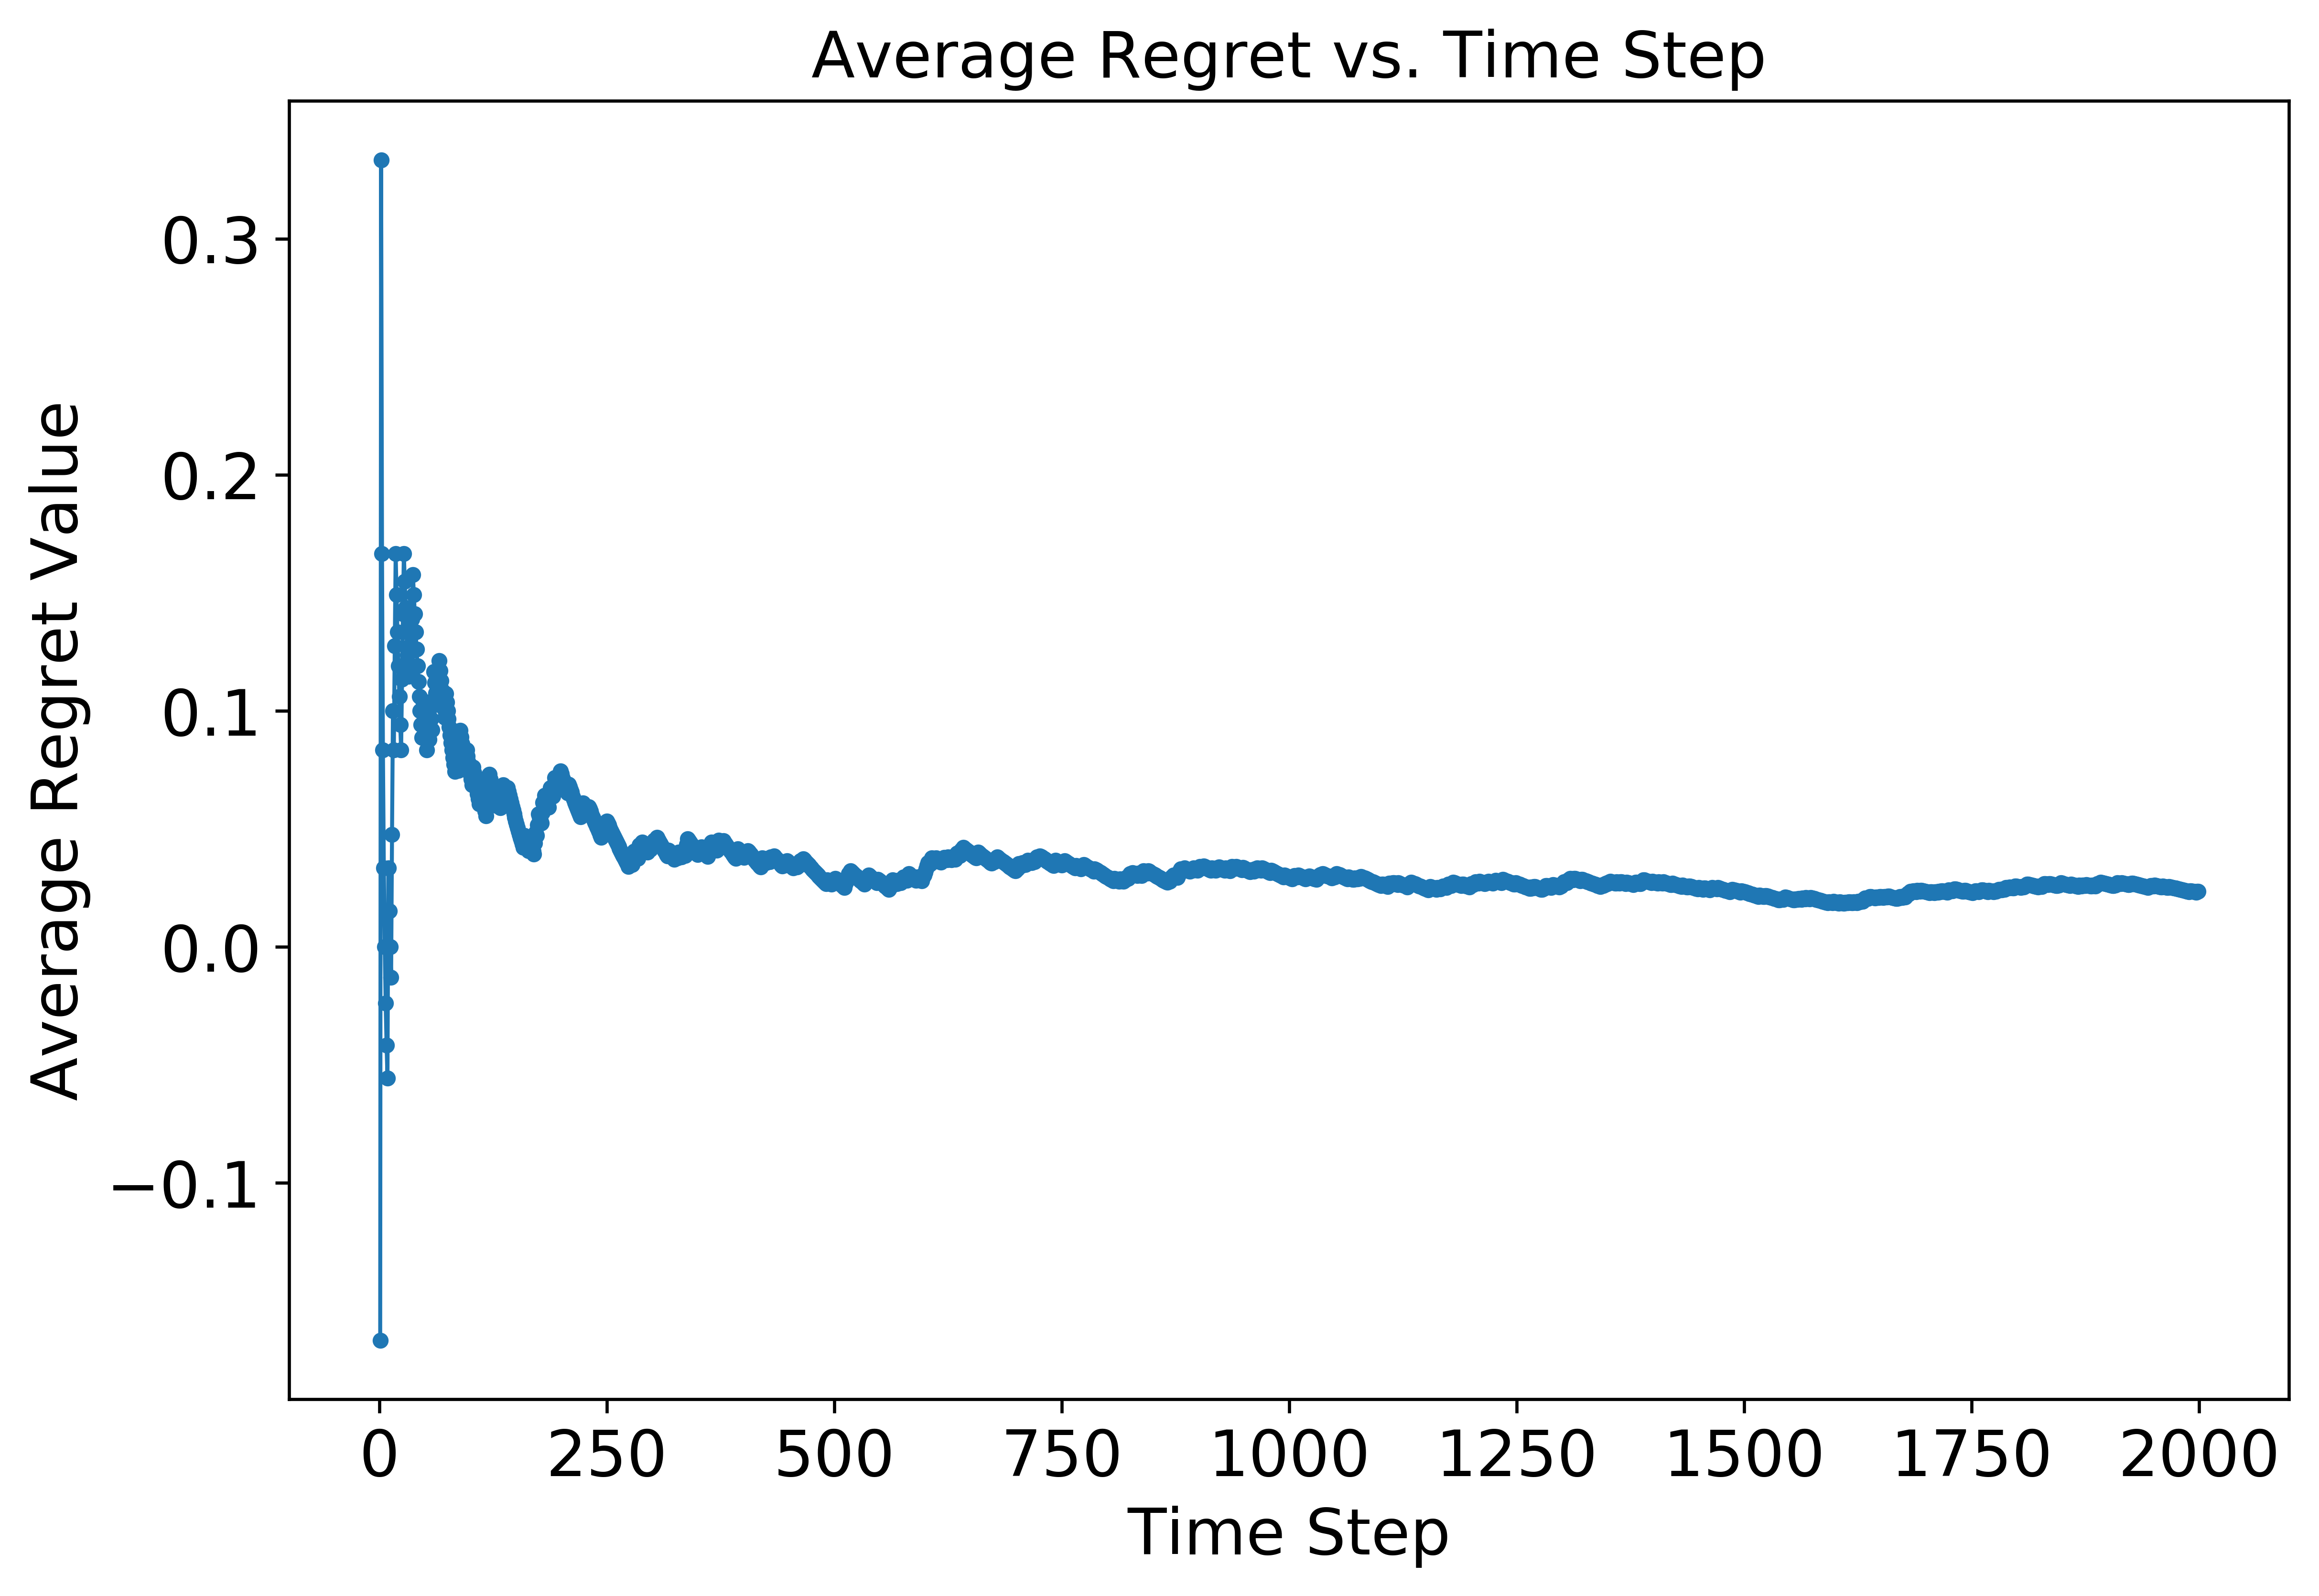

In [117]:
# plot expected regret with time
mu_star = max(probs)
ts = [i for i in range(T)]
avg_regret_list = [mu_star - avg_reward_list[t] for t in ts]

# avg. regret
plt.figure(figsize=(9,6),dpi=600)
plt.plot(ts, avg_regret_list, ".-", linewidth = 1)
plt.xlabel("Time Step", fontsize = 16)
plt.ylabel("Average Regret Value", fontsize = 16)
plt.title("Average Regret vs. Time Step", fontsize = 16)
# plt.xlim([0.1,3])
# plt.ylim([-0.2,0.3])
plt.tick_params(axis='both',labelsize=16)

In [56]:
print(alpha)
print(beta)

[4.0, 26.0, 72.0, 212.0, 8034.0]
[8.0, 18.0, 30.0, 66.0, 1540.0]


In [31]:
#  = np.random.beta(1,1)
# np.argmax([1,2,3])
np.random.binomial(1,0.5)

0